In [1]:
from GeneticFunctions import *
from Problems import *
from Population import*
from PSO import *
from pandas_plink import read_plink1_bin
import pandas as pd

In [2]:
pheno_file = "C:\\Users\\13042\\Desktop\\Maestria\\Tesis\\Data\\toy\\QC2--phased--Data--001375--R--OMNI2.5.SIGMAv1_MCDS.toy.pheno"
prefix = "C:\\Users\\13042\\Desktop\\Maestria\\Tesis\\Data\\toy\\QC2--Data--001375--R--OMNI2.5.SIGMAv1_MCDS.toy"
sumstat_file = "C:\\Users\\13042\\Desktop\\Maestria\\Tesis\\Data\\toy\\gwas--bmi.tsv.toy"

In [2]:
prefix = "C:\\Users\\13042\\Desktop\\Maestria\\Tesis\\Data\\000618\\R\\STAGE1hg19"
pheno_file = "C:\\Users\\13042\\Desktop\\Maestria\\Tesis\\Data\\000618\\R\\STAGE1hg19.pheno"
sumstat_file = "C:\\Users\\13042\\Desktop\\Maestria\\Tesis\\Data\\GCST90239664--hg19.tsv"

In [3]:
HTGSM = Population("BinaryClassification", prefix, pheno_file,sumstat_file,"T2D", config_file="inputs/params_PSO.cfg", optimizer="PSO")

Using 11 CPUs


c:\Users\13042\Desktop\Maestria\Semestre4\Evolutionary Computation\HWs\PSO-PolygenicScore\GeneticFunctions\aux_functions.py:35: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sumstats = pd.read_csv(sumstats_path, sep='\t')


282,056 variants to be matched.
1 ambiguous SNPs have been removed.
138 variants have been matched; 0 were flipped and 37 were reversed.
124 rows were removed due to the p_value threshold.
14 SNPs passed the p_value threshold


In [4]:
#HTGSM.P['STATUS'] = HTGSM.P['STATUS'].replace({'CASE': 1, 'CONTROL': 0})
HTGSM.prepare_data()
HTGSM.train_test_split()

In [5]:
HTGSM.load_config()

Loaded optimizer parameters: {'pop_size': 20, 'c1': 2.3, 'c2': 1.4, 'w': 0.8, 'maxiter': 20, 'p_shrinkage': 0.45, 'p_aug': 0.05}


In [6]:
HTGSM.optimize_weights()

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       20 |        - |       - |      20 |  2.30000 |  1.40000 |  0.6959292889 |  0.6927337646
     2 |       40 |  0.42912 |       2 |  0.6705 |  2.32821 |  1.50000 |  0.6959292889 |  0.6927337646
     3 |       60 |  0.42912 |       2 |  0.6705 |  2.37391 |  1.50000 |  0.6959292889 |  0.6927337646
     4 |       80 |  0.42912 |       2 |  0.6705 |  2.42253 |  1.50000 |  0.6959292889 |  0.6927337646
     5 |      100 |  0.00003 |       3 |  0.4000 |  2.45900 |  1.53647 |  0.6932080418 |  0.6653544307
     6 |      120 |  0.43746 |       2 |  0.6752 |  2.49447 |  1.50099 |  0.6932080418 |  0.6653544307
     7 |      140 |  0.22494 |       3 |  0.5447 |  2.47905 |  1.52889 |  0.6848220736 |  0.6335223317
     8 |      160 |  0.17574 |       3 |  0.5129 |  2.45540 |  1.56170 |  0.6747877657 |  0.6312276125
     9 |      180 | -9.4E-03 |       3 |  0.3941 |  2.43315 |  1.59276 | 

In [9]:
HTGSM.optimizer = "PSO"
HTGSM.config_file="inputs/params_PSO.cfg"
HTGSM.load_config()

Loaded optimizer parameters: {}


In [8]:
HTGSM.optimize_weights()

KeyError: 'p_shrinkage'

ROC curve testing AUC score: 1.00


c:\Users\13042\anaconda3\envs\my_env\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


AttributeError: 'NoneType' object has no attribute 'get_params'

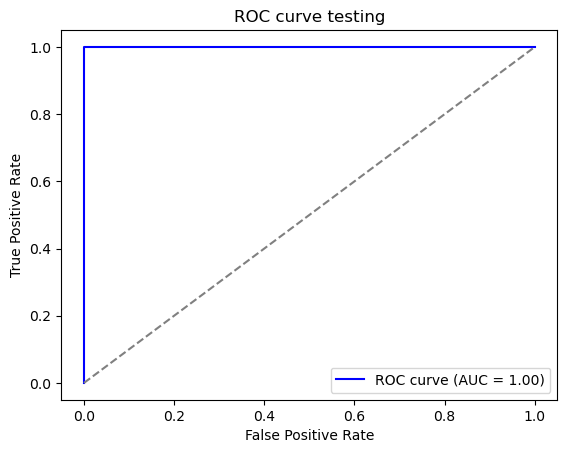

In [ ]:
HTGSM.return_auc(HTGSM.train, title = "ROC curve training")
HTGSM.return_auc(HTGSM.test, title = "ROC curve testing")

In [7]:
HTGSM.best_solution

array([ 0.4019607 , -0.81908421])

In [8]:
HTGSM.return_auc(HTGSM.test)

AttributeError: 'NoneType' object has no attribute 'gbest'

In [ ]:
HTGSM.return_auc(HTGSM.train)